### **Installation of Libraries**

In [308]:
'''
%pip install pandas
%pip install matplotlib
%pip install seaborn
%pip install scikit-learn
'''

'\n%pip install pandas\n%pip install matplotlib\n%pip install seaborn\n%pip install scikit-learn\n'

### **Importing Libraries**

In [309]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score

### **Exploring & Processing Data**

In [310]:
# Reading 'data.csv' into a pandas dataframe
company_data = pd.read_csv("data\\data.csv")

In [311]:
company_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [312]:
company_data.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,1.256969e-04,0.0,0.458143,0.000725,0.0,0.147950,0.147950,0.147950,0.169141,0.311664,0.017560,0.095921,0.138736,0.022102,0.848195,0.688979,0.688979,0.217535,4.980000e+09,0.000327,0.263100,0.363725,0.002259,0.001208,0.629951,0.021266,0.207576,0.792424,0.005024,0.390284,0.006479,0.095885,0.137757,0.398036,0.086957,0.001814,0.003487,1.820926e-04,1.165007e-04,0.032903,0.034164,0.392913,0.037135,0.672775,0.166673,0.190643,0.004094,0.001997,1.473360e-04,0.147308,0.334015,0.276920,0.001036,0.676269,0.721275,0.339077,0.025592,0.903225,0.002022,0.064856,7.010000e+08,6.550000e+09,0.593831,4.580000e+08,0.671568,0.424206,0.676269,0.339077,0.126549,0.637555,0.458609,0.520382,0.312905,0.118250,0,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,2.897851e-04,0.0,0.461867,0.000647,0.0,0.182251,0.182251,0.182251,0.208944,0.318137,0.021144,0.093722,0.169918,0.022080,0.848088,0.689693,0.689702,0.217620,6.110000e+09,0.000443,0.264516,0.376709,0.006016,0.004039,0.635172,0.012502,0.171176,0.828824,0.005059,0.376760,0.005835,0.093743,0.168962,0.397725,0.064468,0.001286,0.004917,9.360000e+09,7.190000e+08,0.025484,0.0068

In [313]:
company_data.columns

Index(['Bankrupt?', ' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Operating Gross Margin', ' Realized Sales Gross Margin',
       ' Operating Profit Rate', ' Pre-tax net Interest Rate',
       ' After-tax net Interest Rate',
       ' Non-industry income and expenditure/revenue',
       ' Continuous interest rate (after tax)', ' Operating Expense Rate',
       ' Research and development expense rate', ' Cash flow rate',
       ' Interest-bearing debt interest rate', ' Tax rate (A)',
       ' Net Value Per Share (B)', ' Net Value Per Share (A)',
       ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons',
       ' Cash Flow Per Share', ' Revenue Per Share (Yuan ¥)',
       ' Operating Profit Per Share (Yuan ¥)',
       ' Per Share Net profit before tax (Yuan ¥)',
       ' Realized Sales Gross Profit Growth Rate',
       ' Operating Profit

In [314]:
# Some columns in the dataframe have spaces in front of them, therefore there is a need to remove them.
company_data.columns = company_data.columns.str.strip()

In [315]:
# Checking for any outliers/ anomalies
company_data['Bankrupt?'].unique()

array([1, 0], dtype=int64)

In [316]:
# Checking for duplicate rows
company_data.duplicated().any()

False

### **Understanding the dataset's columns**

**Bankrupt?** - Column indicating whether a company went bankrupt or not.

**ROA(C) before interest and depreciation before interest** -  Return on Assets (ROA) measures how efficiently a company is using its assets to generate profit before accounting for interest and depreciation.


**ROA(A) before interest and % after tax** - Another measure of Return on Assets, adjusted for taxes.


**ROA(B) before interest and depreciation after tax** - ROA adjusted for taxes and depreciation.


**Operating Gross Margin** - The percentage of revenue that remains after subtracting the cost of goods sold.


**Realized Sales Gross Margin** - Similar to operating gross margin but may include additional realized sales.


**Operating Profit Rate** - Operating profit as a percentage of total revenue.


**Pre-tax net Interest Rate** - The proportion of pre-tax profit that goes towards paying interest on debt.


**After-tax net Interest Rate** - Similar to pre-tax net interest rate but calculated after accounting for taxes.


**Non-industry income and expenditure/revenue** - Income and expenses not related to the core industry operations as a proportion of revenue.


**Continuous interest rate (after tax)** - Interest rate after accounting for taxes.


**Operating Expense Rate** - Operating expenses as a percentage of total revenue.


**Research and development expense rate** - Research and development expenses as a percentage of revenue.


**Cash flow rate** - Cash flow as a percentage of revenue.


**Interest-bearing debt interest rate** - Interest rate on debt.


**Tax rate (A)** - The rate at which taxes are applied.


**Net Value Per Share (B)** - Net value per share calculation based on a particular methodology.


**Net Value Per Share (A)** - Another calculation for net value per share.


**Net Value Per Share (C)** - Yet another calculation for net value per share.


**Persistent EPS in the Last Four Seasons** - Earnings per share (EPS) over the last four financial reporting periods.


**Cash Flow Per Share** - Cash flow generated per share.


**Revenue Per Share (Yuan ¥)** - Revenue generated per share in Yuan.


**Operating Profit Per Share (Yuan ¥)** - Operating profit per share in Yuan.


**Per Share Net profit before tax (Yuan ¥)** - Net profit per share before taxes in Yuan.


**Realized Sales Gross Profit Growth Rate** - Growth rate of gross profit from realized sales.


**Operating Profit Growth Rate** - Growth rate of operating profit.


**After-tax Net Profit Growth Rate** - Growth rate of net profit after taxes.


**Regular Net Profit Growth Rate** - Growth rate of regular net profit.


**Continuous Net Profit Growth Rate** - Continuous growth rate of net profit.


**Total Asset Growth Rate** - Growth rate of total assets.


**Net Value Growth Rate** - Growth rate of net value.


**Total Asset Return Growth Rate Ratio** - Ratio of growth rates of total assets and returns.


**Cash Reinvestment %** - Percentage of cash reinvested.


**Current Ratio** - Ratio of current assets to current liabilities.


**Quick Ratio** - Ratio of quick assets (liquid assets) to current liabilities.


**Interest Expense Ratio** - Ratio of interest expenses to total expenses.


**Total debt/Total net worth** - Ratio of total debt to total net worth.


**Debt ratio %** - Percentage of assets financed by debt.


**Net worth/Assets** - Ratio of net worth to total assets.


**Long-term fund suitability ratio (A)** - Suitability of long-term funds for the company.


**Borrowing dependency** - Dependency on borrowing.


**Contingent liabilities/Net worth** - Ratio of contingent liabilities to net worth.


**Operating profit/Paid-in capital** - Operating profit as a proportion of paid-in capital.


**Net profit before tax/Paid-in capital** - Net profit before taxes as a proportion of paid-in capital.


**Inventory and accounts receivable/Net value** - Ratio of inventory and accounts receivable to net value.


**Total Asset Turnover** - Efficiency of assets in generating revenue.


**Accounts Receivable Turnover** - How quickly receivables are collected.


**Average Collection Days** - Average number of days it takes to collect receivables.


**Inventory Turnover Rate (times)** - How many times inventory is sold and replaced over a period.


**Fixed Assets Turnover Frequency** - How efficiently fixed assets are used to generate sales.


**Net Worth Turnover Rate (times)** - How many times net worth is turned over in generating sales.


**Revenue per person** - Revenue generated per employee.


**Operating profit per person** - Operating profit generated per employee.


**Allocation rate per person** - Allocation of resources per employee.


**Working Capital to Total Assets** - Proportion of working capital to total assets.


**Quick Assets/Total Assets** - Proportion of quick assets to total assets.

**Current Assets/Total Assets** - Proportion of current assets to total assets.


**Cash/Total Assets** - Proportion of cash to total assets.


**Quick Assets/Current Liability** - Ratio of quick assets to current liabilities.


**Cash/Current Liability** - Ratio of cash to current liabilities.


**Current Liability to Assets** - Ratio of current liabilities to assets.


**Operating Funds to Liability** - Proportion of operating funds to liabilities.


**Inventory/Working Capital** - Ratio of inventory to working capital.


**Inventory/Current Liability** - Ratio of inventory to current liabilities.


**Current Liabilities/Liability** - Ratio of current liabilities to total liabilities.


**Working Capital/Equity** - Ratio of working capital to equity.


**Current Liabilities/Equity** - Ratio of current liabilities to equity.


**Long-term Liability to Current Assets** - Ratio of long-term liabilities to current assets.


**Retained Earnings to Total Assets** - Ratio of retained earnings to total assets.


**Total income/Total expense** - Ratio of total income to total expenses.


**Total expense/Assets** - Ratio of total expenses to assets.


**Current Asset Turnover Rate** - How quickly current assets are turned into revenue.


**Quick Asset Turnover Rate** - How quickly quick assets are turned into revenue.


**Working capital Turnover Rate** - How quickly working capital is turned into revenue.


**Cash Turnover Rate** - How quickly cash is turned into revenue.


**Cash Flow to Sales** - Proportion of cash flow to sales.


**Fixed Assets to Assets** - Proportion of fixed assets to total assets.


**Current Liability to Liability** - Ratio of current liabilities to total liabilities.


**Current Liability to Equity** - Ratio of current liabilities to equity.


**Equity to Long-term Liability** - Ratio of equity to long-term liabilities.


**Cash Flow to Total Assets** - Proportion of cash flow to total assets.


**Cash Flow to Liability** - Proportion of cash flow to liabilities.


**CFO to Assets** - Ratio of cash flow from operations to total assets.


**Cash Flow to Equity** - Proportion of cash flow to equity.


**Current Liability to Current Assets** - Ratio of current liabilities to current assets.


**Liability-Assets Flag** - Indicator of liabilities compared to assets.


**Net Income to Total Assets** - Ratio of net income to total assets.


**Total assets to GNP price** - Ratio of total assets to gross national product price.


**No-credit Interval** - Interval without credit.


**Gross Profit to Sales** - Proportion of gross profit to sales.


**Net Income to Stockholder's Equity** - Ratio of net income to stockholder's equity.


**Liability to Equity** - Ratio of liabilities to equity.


**Degree of Financial Leverage (DFL)** - Measure of how much debt is used to finance assets.


**Interest Coverage Ratio (Interest expense to EBIT)** - Measure of a company's ability to pay interest on its outstanding debt.


**Net Income Flag** - Indicator of net income.


**Equity to Liability** - Ratio of equity to liabilities.


In [317]:
# Because of the large amount of columns and rows, jupyter cell outputs are being truncated. Therefore some settings were modified with the code below.

# Option to display all rows
pd.set_option('display.max_rows', None) 

# Option to display all columns
pd.set_option('display.max_columns', None) 

# Option to display full column width
pd.set_option('display.max_colwidth', None) 

In [318]:
# Exploring dataframe's dimensionality
company_data.shape

(6819, 96)

In [319]:
# Checking the dataset for null values
missing_data = company_data.isnull().sum()

print("Missing data in each column:")
print(missing_data)

Missing data in each column:
Bankrupt?                                                  0
ROA(C) before interest and depreciation before interest    0
ROA(A) before interest and % after tax                     0
ROA(B) before interest and depreciation after tax          0
Operating Gross Margin                                     0
Realized Sales Gross Margin                                0
Operating Profit Rate                                      0
Pre-tax net Interest Rate                                  0
After-tax net Interest Rate                                0
Non-industry income and expenditure/revenue                0
Continuous interest rate (after tax)                       0
Operating Expense Rate                                     0
Research and development expense rate                      0
Cash flow rate                                             0
Interest-bearing debt interest rate                        0
Tax rate (A)                                            

In [320]:
# Checking for '0's 
zero_counts = company_data.apply(lambda x: (x == 0).sum())
zero_counts

Bankrupt?                                                  6599
ROA(C) before interest and depreciation before interest       1
ROA(A) before interest and % after tax                        1
ROA(B) before interest and depreciation after tax             1
Operating Gross Margin                                        1
Realized Sales Gross Margin                                   1
Operating Profit Rate                                         1
Pre-tax net Interest Rate                                     1
After-tax net Interest Rate                                   1
Non-industry income and expenditure/revenue                   1
Continuous interest rate (after tax)                          1
Operating Expense Rate                                        1
Research and development expense rate                      1424
Cash flow rate                                                1
Interest-bearing debt interest rate                         891
Tax rate (A)                            

**Handling 0 values**

In [321]:
'''
Dropping columns with '0' values beside some exluded columns where '0' is not an anomaly.
The reasoning behind dropping the columns and not handling them because the ratio of them is really small compared to the dataset's size.
Some columns with larger amount of '0's will be handled below
'''
# Columns to exclude from dropping zero occurrences
columns_to_exclude = ['Bankrupt?', 'Research and development expense rate', 
                      'Interest-bearing debt interest rate', 'Tax rate (A)', 
                      'Inventory/Current Liability', 'Long-term Liability to Current Assets', 
                      'Liability-Assets Flag']

# Iterate through columns and drop zero occurrences in columns except specified
for column in company_data.columns:
    if column not in columns_to_exclude:
        company_data = company_data[company_data[column] != 0]

In [322]:
# Calculating mean's for the columns where 0's are goint to be replaced with the respective mean
mean_values = company_data[['Research and development expense rate', 'Interest-bearing debt interest rate', 'Inventory/Current Liability']].mean()

# Filling zeros in columns with mean values
company_data['Research and development expense rate'] = company_data['Research and development expense rate'].replace(0, mean_values['Research and development expense rate'])
company_data['Interest-bearing debt interest rate'] = company_data['Interest-bearing debt interest rate'].replace(0, mean_values['Interest-bearing debt interest rate'])
company_data['Inventory/Current Liability'] = company_data['Inventory/Current Liability'].replace(0, mean_values['Inventory/Current Liability'])

In [323]:
# Dropping two columns because of the high 0's values. Even if they were to be filled with mean, mode or quantiles, still data isn't as accurate.
company_data.drop(columns=['Tax rate (A)', 'Long-term Liability to Current Assets'], inplace=True)

In [324]:
'''
Beacuse the really high dimensionality of the dataset, we calculated a correlation matrix to identfify high correlations between attributes.
High correlations were considered those above 95%. 
Because a 96x96 table/matrix is pretty hard to read, correlatons were sorted with quicksort algorithm and the result was cut to the results where
high correlations were detected.
'''
correlation_matrix = company_data.corr()

high_correlation = correlation_matrix[(correlation_matrix > 0.95) & (correlation_matrix < 1)]

top_correlations = high_correlation.unstack().sort_values(kind="quicksort")

print(top_correlations[:34])

ROA(A) before interest and % after tax                   ROA(B) before interest and depreciation after tax          0.954095
ROA(B) before interest and depreciation after tax        ROA(A) before interest and % after tax                     0.954095
Persistent EPS in the Last Four Seasons                  Per Share Net profit before tax (Yuan ¥)                   0.956195
Per Share Net profit before tax (Yuan ¥)                 Persistent EPS in the Last Four Seasons                    0.956195
Net profit before tax/Paid-in capital                    Persistent EPS in the Last Four Seasons                    0.959247
Persistent EPS in the Last Four Seasons                  Net profit before tax/Paid-in capital                      0.959247
Net profit before tax/Paid-in capital                    Per Share Net profit before tax (Yuan ¥)                   0.964788
Per Share Net profit before tax (Yuan ¥)                 Net profit before tax/Paid-in capital                      0.964788


In [325]:
# Because of the relationships idenfied, some columns are not necessary and are going to be dropped
redundant_columns = ['ROA(B) before interest and depreciation after tax',
                     'ROA(C) before interest and depreciation before interest',
                     'Persistent EPS in the Last Four Seasons',
                     'Net Income to Total Assets',
                     'Pre-tax net Interest Rate',
                     'After-tax net Interest Rate',
                     'After-tax Net Profit Growth Rate',
                     'Operating profit/Paid-in capital',
                     'Net profit before tax/Paid-in capital',
                     'Net Value Per Share (B)',
                     'Net Value Per Share (C)',
                     'Realized Sales Gross Margin',
                     'Gross Profit to Sales']

company_data.drop(columns=redundant_columns, inplace=True)

In [326]:
company_data.describe()

,Bankrupt?,ROA(A) before interest and % after tax,Operating Gross Margin,Operating Profit Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Net Value Per Share (A),Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Total assets to GNP price,No-credit Interval,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6767.000000,6767.000000,6767.000000,6767.000000,6767.000000,6767.000000,6.767000e+03,6.767000e+03,6767.000000,6.767000e+03,6767.000000,6767.000000,6767.000000,6767.000000,6767.000000,6767.000000,6767.000000,6767.000000,6767.000000,6.767000e+03,6767.000000,6767.000000,6767.000000,6767.000000,6.767000e+03,6767.000000,6.767000e+03,6767.000000,6767.000000,6767.000000,6767.000000,6767.000000,6767.000000,6767.000000,6.767000e+03,6.767000e+03,6.767000e+03,6.767000e+03,6767.000000,6767.000000,6767.000000,6.767000e+03,6767.000000,6767.000000,6767.000000,6767.000000,6.767000e+03,6.767000e+03,6767.000000,6767.000000,6767.000000,6.767000e+03,6767.000000,6767.000000,6767.000000,6767.000000,6767.000000,6767.000000,6.767000e+03,6.767000e+03,6767.000000,6.767000e+03,6767.000000,6767.000000,6767.000000,6767.000000,6767.000000,6767.000000,6767.000000,6767.000000,6767.000000,6767.000000,6767.000000,6.767000e+03,6767.000000,6767.000000,6767.000000,6767.000000,6767.000000,6767.0,6767.000000
mean,0.030885,0.559370,0.607960,0.998982,0.303521,0.781573,2.005082e+09,2.359739e+09,0.467472,1.856613e+07,0.190816,0.323617,0.038919,0.109237,0.184573,0.022403,0.848107,0.689260,0.217682,5.523241e+09,0.000521,0.264184,0.379725,0.014780,8.440964e+06,0.631092,4.204374e+06,0.112714,0.887286,0.008544,0.374537,0.005821,0.402483,0.141914,1.006857e+07,8.443623e+06,2.154348e+09,1.010308e+09,0.038270,0.035327,0.400705,1.082802e+07,0.814649,0.401133,0.522855,0.124499,2.506280e+06,3.610669e+07,0.090265,0.353907,0.277470,5.662322e+07,0.761781,0.735937,0.331316,0.935134,0.002403,0.028926,1.198292e+09,2.168138e+09,0.593990,2.478143e+09,0.671572,0.249424,0.761781,0.331316,0.115438,0.649903,0.461891,0.593881,0.315539,0.030938,0.000296,1.744111e+07,0.624004,0.840598,0.280238,0.027551,0.565423,1.0,0.047137
std,0.173019,0.063896

In [336]:
# Saving preprocessed dataset
company_data.to_csv('data_preprocessed\\company_bankrupcy.csv')

### **Visualizing data**

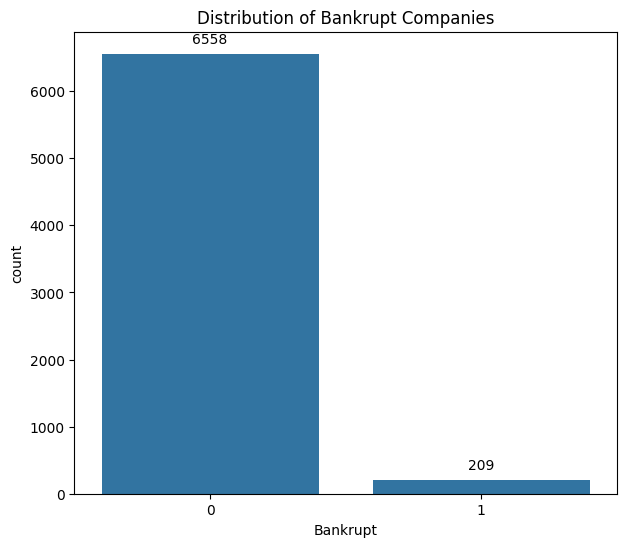

In [328]:
# Visualizing the distribution of bankrupt and non-bankrupt companies
plt.figure(figsize=(7, 6))
sns.countplot(data=company_data, x='Bankrupt?')

# Labels on top of the column bars
for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.xlabel('Bankrupt')
plt.title('Distribution of Bankrupt Companies')
plt.show()

In [329]:
correlation_matrix = company_data.corr()

# Creating a heapmap to represent correlations between columns
plt.figure(figsize=(100, 100))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

### **Prediction Model**

In [330]:
company_data.shape

(6767, 81)

In [331]:
company_data.columns

Index(['Bankrupt?', 'ROA(A) before interest and % after tax',
       'Operating Gross Margin', 'Operating Profit Rate',
       'Non-industry income and expenditure/revenue',
       'Continuous interest rate (after tax)', 'Operating Expense Rate',
       'Research and development expense rate', 'Cash flow rate',
       'Interest-bearing debt interest rate', 'Net Value Per Share (A)',
       'Cash Flow Per Share', 'Revenue Per Share (Yuan ¥)',
       'Operating Profit Per Share (Yuan ¥)',
       'Per Share Net profit before tax (Yuan ¥)',
       'Realized Sales Gross Profit Growth Rate',
       'Operating Profit Growth Rate', 'Regular Net Profit Growth Rate',
       'Continuous Net Profit Growth Rate', 'Total Asset Growth Rate',
       'Net Value Growth Rate', 'Total Asset Return Growth Rate Ratio',
       'Cash Reinvestment %', 'Current Ratio', 'Quick Ratio',
       'Interest Expense Ratio', 'Total debt/Total net worth', 'Debt ratio %',
       'Net worth/Assets', 'Long-term fund suitabi

#### **Random Forest Classifier**

**Splitting the dataset into training and testing**

In [332]:
# X represents the features, which include everything besides Bankrupt Flag
X = company_data.drop(columns=['Bankrupt?'])
# Y represents the prediction target
y = company_data['Bankrupt?']

# Training and testing data were split in 90% and 10% respectively
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)


**Training the model**

In [333]:
# Initializing the random forest classifier
model = RandomForestClassifier(random_state=42)

# Training the model
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

**Evaluating the model**

In [334]:
# Predicting with the testing data
res = model.predict(X_test)

# Priting model accuracy
accuracy = accuracy_score(y_test, res)
print("Accuracy:", accuracy)

# Printing roc-AUC
roc_auc = roc_auc_score(y_test, res)
print("ROC-AUC Score:", roc_auc)

# Printing classification_report
print("\nClassification Report:")
print(classification_report(y_test, res))


Accuracy: 0.96602658788774
ROC-AUC Score: 0.5576923076923077

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       651
           1       1.00      0.12      0.21        26

    accuracy                           0.97       677
   macro avg       0.98      0.56      0.59       677
weighted avg       0.97      0.97      0.95       677



In [335]:
'''
X_train - features used to train the model
y_train - correct output

random_state - was used to split the data randomly each time the code is ran

precisition - actual correct predictions among correct predictions made by the model

recall - Measures the proporton of actual positive cases that were correctly identified by the model

Mathematically: recall = true positives / (true positives + false negatives) 

f1 score = 2 x (precision x recall)/( precision + recall)

support - how many times the class occurred in the training set

'''

'\nX_train - features used to train the model\ny_train - correct output\n\nrandom_state - was used to split the data randomly each time the code is ran\n\nprecisition - actual correct predictions among correct predictions made by the model\n\nrecall - Measures the proporton of actual positive cases that were correctly identified by the model\n\nMathematically: recall = true positives / (true positives + false negatives) \n\nf1 score = 2 x (precision x recall)/( precision + recall)\n\nsupport - how many times the class occurred in the training set\n'